In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib
import sys
sys.path.append('..')

import GaussianAlgorithms as algo
importlib.reload(algo)

<module 'GaussianAlgorithms' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/GaussianAlgorithms.py'>

In [2]:
mu = 1
sigma = 5
mu0 = 0
sigma0 = 1

In [3]:
Niter = 400
gamma = 0.01
Nrep = 50
Ns = np.array([50, 100, 500, 1000, 1500, 2000])

In [4]:
mean_smc = np.zeros((Nrep, Ns.size))
var_smc = np.zeros((Nrep, Ns.size))
prob_smc = np.zeros((Nrep, Ns.size))
for j in range(Nrep):
    for i in range(Ns.size):
        N = Ns[i]
        X0 = np.random.normal(size = N)
        x, W = algo.SMC_WFR(gamma, Niter, mu, sigma, mu0, sigma0, X0)
        mean_smc[j, i] = np.sum(x[-1, :]*W[-1, :])
        var_smc[j, i] = np.sum(x[-1, :]**2*W[-1, :]) - mean_smc[j, i]**2
        prob_smc[j, i] = np.sum((x[-1, :] > mu)*W[-1, :])

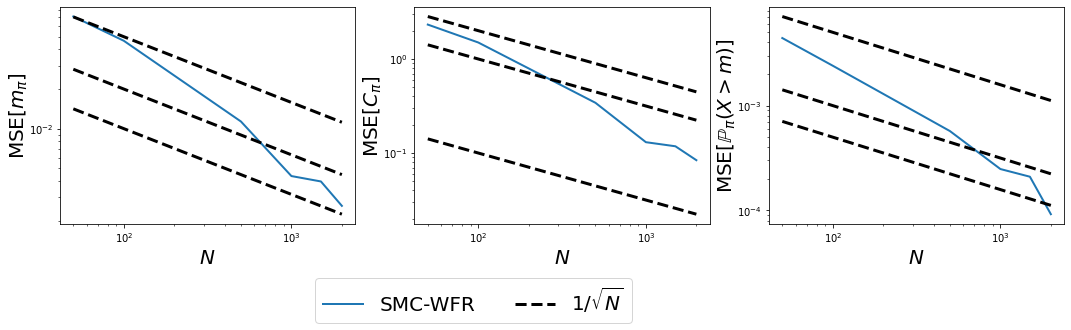

In [18]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.loglog(Ns, np.mean((mean_smc - mu)**2, axis = 0), lw = 2, label = 'SMC-WFR');
plt.loglog(Ns, 0.5*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.loglog(Ns, 0.1*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.loglog(Ns, 0.2*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('MSE[$m_\pi$]', fontsize = 20, labelpad=-1)
# plt.legend(fontsize = 20)
plt.subplot(1, 3, 2)
plt.loglog(Ns, np.mean((var_smc - sigma)**2, axis = 0), lw = 2, label = 'SMC-WFR');
plt.loglog(Ns, 10*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.loglog(Ns, Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.loglog(Ns, 20*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
# plt.legend(fontsize = 20)
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('MSE[$C_\pi$]', fontsize = 20, labelpad=-1)
plt.subplot(1, 3, 3)
plt.loglog(Ns, np.mean((prob_smc - 0.5)**2, axis = 0), lw = 2, label = 'SMC-WFR');
plt.loglog(Ns, 0.05*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed', label = '$1/\sqrt{N}$');
plt.loglog(Ns, 0.005*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.loglog(Ns, 0.01*Ns**(-1/2), lw = 3, c='black', linestyle = 'dashed');
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('MSE[$\mathbb{P}_\pi(X>m)]$', fontsize = 20, labelpad=-1)
legend = plt.legend(fontsize = 20, ncol = 2, loc = 'lower center', bbox_to_anchor=(-1, -0.5))
# plt.savefig('SMC_WFR_rate_target2.pdf', bbox_inches="tight")

In [19]:
def export_legend(legend, filename="legend_rate.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()